# Modeling Car Insurance Claim Outcomes

Insurance companies invest a lot of [time and money](https://www.accenture.com/_acnmedia/pdf-84/accenture-machine-leaning-insurance.pdf) into optimizing their pricing and accurately estimating the likelihood that customers will make a claim. In many countries insurance it is a legal requirement to have car insurance in order to drive a vehicle on public roads, so the market is very large!

## Objectives

1. Build a model to predict whether a customer will make a claim on their insurance during the policy period.
2. Identify the single feature that results in the best performing model, as measured by accuracy.



## The dataset

| Column | Description |
|--------|-------------|
| `id` | Unique client identifier |
| `age` | Client's age: <br> <ul><li>`0`: 16-25</li><li>`1`: 26-39</li><li>`2`: 40-64</li><li>`3`: 65+</li></ul> |
| `gender` | Client's gender: <br> <ul><li>`0`: Female</li><li>`1`: Male</li></ul> |
| `driving_experience` | Years the client has been driving: <br> <ul><li>`0`: 0-9</li><li>`1`: 10-19</li><li>`2`: 20-29</li><li>`3`: 30+</li></ul> |
| `education` | Client's level of education: <br> <ul><li>`0`: No education</li><li>`1`: High school</li><li>`2`: University</li></ul> |
| `income` | Client's income level: <br> <ul><li>`0`: Poverty</li><li>`1`: Working class</li><li>`2`: Middle class</li><li>`3`: Upper class</li></ul> |
| `credit_score` | Client's credit score (between zero and one) |
| `vehicle_ownership` | Client's vehicle ownership status: <br><ul><li>`0`: Does not own their vehilce (paying off finance)</li><li>`1`: Owns their vehicle</li></ul> |
| `vehcile_year` | Year of vehicle registration: <br><ul><li>`0`: Before 2015</li><li>`1`: 2015 or later</li></ul> |
| `married` | Client's marital status: <br><ul><li>`0`: Not married</li><li>`1`: Married</li></ul> |
| `children` | Client's number of children |
| `postal_code` | Client's postal code | 
| `annual_mileage` | Number of miles driven by the client each year |
| `vehicle_type` | Type of car: <br> <ul><li>`0`: Sedan</li><li>`1`: Sports car</li></ul> |
| `speeding_violations` | Total number of speeding violations received by the client | 
| `duis` | Number of times the client has been caught driving under the influence of alcohol |
| `past_accidents` | Total number of previous accidents the client has been involved in |
| `outcome` | Whether the client made a claim on their car insurance (response variable): <br><ul><li>`0`: No claim</li><li>`1`: Made a claim</li></ul> |

In [92]:
# Import required modules
import pandas as pd
import numpy as np
from statsmodels.formula.api import logit
import seaborn as sns
import matplotlib.pyplot as plt

# Import DataFrame 
insurance = pd.read_csv('car_insurance.csv')
insurance.head()

,id,age,gender,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome
0,569520,3,0,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,0,1,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,0,0,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,0,1,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,1,1,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [93]:
# -------------------------------- # 
# Data Preparation
# -------------------------------- # 

# Check for null values
na_cols = insurance.isna().sum()
na_cols = na_cols[na_cols != 0]
null_columns = na_cols.index

# Since distributions of columns with missing values appear to be normal, replace missing values with the mean 
for col in null_columns: 
    insurance[col] = insurance[col].fillna(insurance[col].mean())

# Check for missing values again 
print(insurance.isna().sum())

id                     0
age                    0
gender                 0
driving_experience     0
education              0
income                 0
credit_score           0
vehicle_ownership      0
vehicle_year           0
married                0
children               0
postal_code            0
annual_mileage         0
vehicle_type           0
speeding_violations    0
duis                   0
past_accidents         0
outcome                0
dtype: int64


In [94]:
# -------------------------------- # 
# Logistic Modelling 
# -------------------------------- # 

# Create an empty list to store model results 
models = []

# Feature columns
feature_cols = insurance.drop(['id','outcome'],axis=1).columns

# Loop through features 
for col in feature_cols: 
    # Create and fit the model 
    model = logit(f'outcome ~ {col}',data=insurance).fit()
    # Add model to the models list
    models.append(model)
    
# Create an empty list to store accuracies
accuracies = []

# Loop through models 
for feature in range(0,len(models)):
    # Create confusion matrix
    conf_matrix = models[feature].pred_table()
    # Extract conf_matrix values 
    tp = conf_matrix[0,0]
    tn = conf_matrix[1,1]
    fp = conf_matrix[0,1]
    fn = conf_matrix[1,0]
    # Compute accuracy 
    accuracy = (tp + tn) / (tp+tn+fp+fn)
    # Append accuracy to the list 
    accuracies.append(accuracy)

Optimization terminated successfully.
         Current function value: 0.511794
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.615951
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.467092
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.603742
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.531499
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.572557
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.552412
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.572668
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.586659
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.595431
  

                    accuracy
feature                     
driving_experience    0.7771
age                   0.7747
income                0.7425
vehicle_ownership     0.7351
credit_score          0.7054 



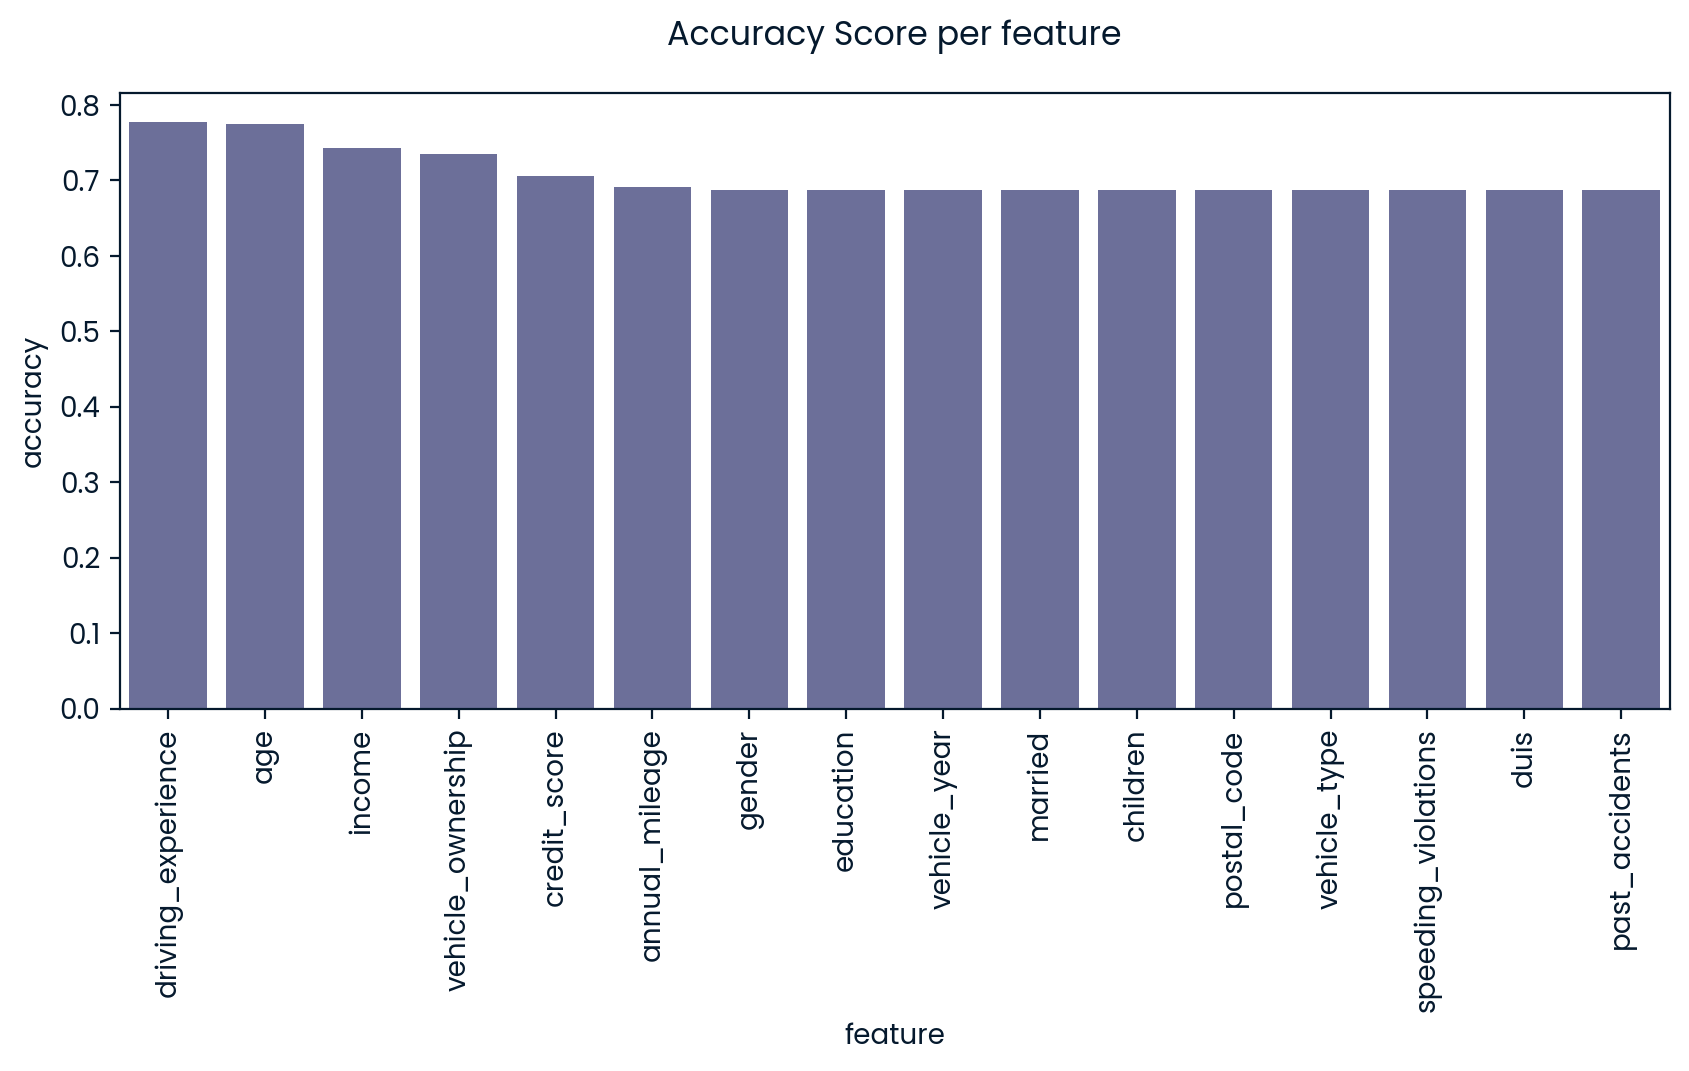

In [95]:
# ---------------------------- # 
# Performance evaluation 
# ---------------------------- # 

# Create a dataframe with feature columns and accuracy score. 
accuracy_df = pd.DataFrame({
    'feature':feature_cols,
    'accuracy':accuracies
})

# Sort descending, and print the top 5 best-performing features
accuracy_df_sorted = accuracy_df.sort_values(by='accuracy',ascending=False).set_index('feature')
print(accuracy_df_sorted.head(),'\n')

# Plot accuracy results 
plt.figure(figsize=(10,4))
ax = sns.barplot(data=accuracy_df_sorted, x=accuracy_df_sorted.index, y='accuracy')
plt.xticks(rotation=90)
ax.set_title('Accuracy Score per feature',y=1.05)
plt.show()

In [96]:
# --------------------------- # 
# Storing results
# --------------------------- # 

best_feature_df = pd.DataFrame({'best_feature':[accuracy_df_sorted.index[0]],
                                'best_accuracy':[accuracy_df_sorted['accuracy'][0]]})

print(best_feature_df)

         best_feature  best_accuracy
0  driving_experience         0.7771
